# Deep Fruits - Image Recognition

## Modules

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
import os

## Load Training Data

In [12]:
# Define paths to both training and validation data
train_path = 'fruits-360/Training/*'
valid_path = 'fruits-360/Validation/*'

In [16]:
def loadData(path):
    ''' Load the images and labels to raw numpy arrays
    Args: 
        path (str), path to folder to parse
        images (list), empty list where array of images will be stored
        labels (list), empty list where lables will be stored
    return:
        images (list, numpy array), contains the images loaded
        labels (list, numpy array), contains the labels for each image
    '''
    
    images = []
    labels = []
    
    # Count the unique labels in the set
    unique_labels = []
    
    for folder in glob.glob(path):
        label = folder.split('/')[-1]
        
        for file in glob.glob(os.path.join(folder, '*.jpg')):
            image = cv2.imread(file, cv2.IMREAD_COLOR)
            # imread loads an image from the specified file and returns it
            image = cv2.resize(image, (45, 45))
            # resize resizes the image to the specified size
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            # converts an input image from one color space to another
            
            images.append(image)
            labels.append(label)
        
        # Append to unique labels in the set
        unique_labels.append(label)
    
    images = np.array(images)
    labels = np.array(labels)
    
    print('%s has %s unique labels, as follows %s' %(path, len(unique_labels), unique_labels))
    print(' ')
    print('%s contains %s images and %s labels' %(path, len(images), len(labels)))
    
    return images, labels

In [17]:
train_images, train_labels = loadData(train_path)

fruits-360/Training/* has 60 unique labels, as follows ['Pear Abate', 'Carambula', 'Apple Red Yellow', 'Peach Flat', 'Apple Red Delicious', 'Maracuja', 'Lemon Meyer', 'Grapefruit Pink', 'Grape White', 'Plum', 'Salak', 'Peach', 'Mandarine', 'Papaya', 'Passion Fruit', 'Apple Golden 2', 'Strawberry', 'Pineapple', 'Kaki', 'Raspberry', 'Apple Golden 3', 'Guava', 'Cocos', 'Mango', 'Apple Golden 1', 'Quince', 'Banana', 'Tangelo', 'Huckleberry', 'Apple Braeburn', 'Apple Red 2', 'Pitahaya Red', 'Limes', 'Dates', 'Pear', 'Pomegranate', 'Granadilla', 'Apricot', 'Clementine', 'Apple Granny Smith', 'Grape Pink', 'Pear Monster', 'Pear Williams', 'Kiwi', 'Kumquats', 'Cherry', 'Tamarillo', 'Nectarine', 'Apple Red 3', 'Banana Red', 'Avocado', 'Grapefruit White', 'Lemon', 'Litchi', 'Avocado ripe', 'Cactus fruit', 'Apple Red 1', 'Orange', 'Pepino', 'Grape White 2']
 
fruits-360/Training/* contains 28736 images and 28736 labels


In [18]:
valid_images, valid_labels = loadData(valid_path)

fruits-360/Validation/* has 60 unique labels, as follows ['Pear Abate', 'Carambula', 'Apple Red Yellow', 'Peach Flat', 'Apple Red Delicious', 'Maracuja', 'Lemon Meyer', 'Grapefruit Pink', 'Grape White', 'Plum', 'Salak', 'Peach', 'Mandarine', 'Papaya', 'Passion Fruit', 'Apple Golden 2', 'Strawberry', 'Pineapple', 'Kaki', 'Raspberry', 'Apple Golden 3', 'Guava', 'Cocos', 'Mango', 'Apple Golden 1', 'Quince', 'Banana', 'Tangelo', 'Huckleberry', 'Apple Braeburn', 'Apple Red 2', 'Pitahaya Red', 'Limes', 'Dates', 'Pear', 'Pomegranate', 'Granadilla', 'Apricot', 'Clementine', 'Apple Granny Smith', 'Grape Pink', 'Pear Monster', 'Pear Williams', 'Kiwi', 'Kumquats', 'Cherry', 'Tamarillo', 'Nectarine', 'Apple Red 3', 'Banana Red', 'Avocado', 'Grapefruit White', 'Lemon', 'Litchi', 'Avocado ripe', 'Cactus fruit', 'Apple Red 1', 'Orange', 'Pepino', 'Grape White 2']
 
fruits-360/Validation/* contains 9673 images and 9673 labels


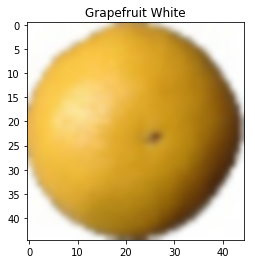

In [19]:
# Show a random TRAINING image and its label
rmd=np.random.randint(0,len(train_images))
plt.title(train_labels[rmd])
plt.imshow(np.asarray(train_images[rmd],dtype="uint8"),interpolation="bicubic")

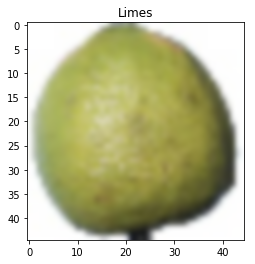

In [20]:
# Show a random VALIDATION image and its label
rmd=np.random.randint(0,len(valid_images))
plt.title(valid_labels[rmd])
plt.imshow(np.asarray(valid_images[rmd],dtype="uint8"),interpolation="bicubic")

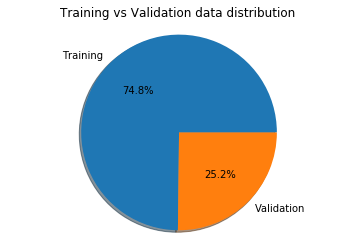

In [21]:
# Training and validation data distribution
labels = 'Training', 'Validation'
sizes = [len(train_images), len(valid_images)]

fig1, ax1 = plt.subplots()
plt.title('Training vs Validation data distribution')
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()